In [2]:
%matplotlib inline

In [135]:
from __future__ import print_function

import collections

import pandas as pd

import seaborn as sns

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso

from sklearn.feature_selection import SelectKBest


In [30]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

In [19]:
label_encoder = LabelEncoder()

In [21]:
labeled_data = pd.read_csv("/home/gus/Documents/zim/main/BCH/Projects/Jodie_and_James/labeled_data_gus.csv", low_memory=False)
labeled_data.head()

,ID,SiteSubject ID,Visit,Disease_or_Normal,Age in Years,Sex,ExtentDisease,_1007_PM_s_at,_1053_PM_at,_117_PM_at,...,_AFFX-r2-TagO-3_at,_AFFX-r2-TagO-5_at,_AFFX-r2-TagQ-3_at,_AFFX-r2-TagQ-5_at,_AFFX-ThrX-3_at,_AFFX-ThrX-5_at,_AFFX-ThrX-M_at,_AFFX-TrpnX-3_at,_AFFX-TrpnX-5_at,_AFFX-TrpnX-M_at
0,5500254131236090112251_101136.A02,7532-00001,Week 0,diseased,44,F,Extensive,9.674214,7.176943,7.530333,...,4.498194,3.455266,3.531909,3.470912,4.453369,3.499877,3.659598,3.164482,3.729298,3.746295
1,5500254131236090112251_101136.B08,6502-00028,Week 0,diseased,27,M,Extensive,10.287132,7.426960,6.380001,...,4.753581,3.691656,3.603318,3.872274,4.784521,3.577326,3.710226,3.282151,3.888459,3.964700
2,5500254131236090112251_101136.E05,7756-00011,Week 0,diseased,46,M,Extensive,9.842515,7.312331,7.272196,...,4.408918,3.354399,3.609886,3.925905,4.356703,3.507491,3.593398,3.149996,3.718695,3.525178
3,5500254131236090112251_101136.G12,7530-00008,Week 0,diseased,56,M,Extensive,9.622503,7.743776,7.129598,...,4.668693,3.384722,3.578263,3.414231,4.444389,3.452806,3.561378,3.298016,3.663710,3.640893
4,5500254131236090112252_101136.A08,7530-00011,Week 0,diseased,63,F,Extensive,9.720709,7.099984,6.909100,...,4.703255,3.692352,3.520985,3.726691,4.575027,3.557793,3.549866,3.216523,3.678702,3.821898


In [22]:
labeled_data = labeled_data.set_index(labeled_data.ID.values).drop('ID',1)

In [23]:
labeled_data.head()

,SiteSubject ID,Visit,Disease_or_Normal,Age in Years,Sex,ExtentDisease,_1007_PM_s_at,_1053_PM_at,_117_PM_at,_121_PM_at,...,_AFFX-r2-TagO-3_at,_AFFX-r2-TagO-5_at,_AFFX-r2-TagQ-3_at,_AFFX-r2-TagQ-5_at,_AFFX-ThrX-3_at,_AFFX-ThrX-5_at,_AFFX-ThrX-M_at,_AFFX-TrpnX-3_at,_AFFX-TrpnX-5_at,_AFFX-TrpnX-M_at
5500254131236090112251_101136.A02,7532-00001,Week 0,diseased,44,F,Extensive,9.674214,7.176943,7.530333,7.032434,...,4.498194,3.455266,3.531909,3.470912,4.453369,3.499877,3.659598,3.164482,3.729298,3.746295
5500254131236090112251_101136.B08,6502-00028,Week 0,diseased,27,M,Extensive,10.287132,7.426960,6.380001,7.577584,...,4.753581,3.691656,3.603318,3.872274,4.784521,3.577326,3.710226,3.282151,3.888459,3.964700
5500254131236090112251_101136.E05,7756-00011,Week 0,diseased,46,M,Extensive,9.842515,7.312331,7.272196,6.793723,...,4.408918,3.354399,3.609886,3.925905,4.356703,3.507491,3.593398,3.149996,3.718695,3.525178
5500254131236090112251_101136.G12,7530-00008,Week 0,diseased,56,M,Extensive,9.622503,7.743776,7.129598,6.437619,...,4.668693,3.384722,3.578263,3.414231,4.444389,3.452806,3.561378,3.298016,3.663710,3.640893
5500254131236090112252_101136.A08,7530-00011,Week 0,diseased,63,F,Extensive,9.720709,7.099984,6.909100,6.427605,...,4.703255,3.692352,3.520985,3.726691,4.575027,3.557793,3.549866,3.216523,3.678702,3.821898


In [24]:
y_qual = labeled_data['Disease_or_Normal']
y_quant = labeled_data['ExtentDisease']

X = labeled_data.iloc[:,6:]


X_train_qual, X_test_qual, y_train_qual, y_test_qual = train_test_split(X, y_qual,
                                                                        test_size=0.33, random_state=42, stratify=y_qual
                                                                       )

X_train_quant, X_test_quant, y_train_quant, y_test_quant = train_test_split(X, y_quant,
                                                                            test_size=0.33, random_state=42, stratify=y_quant
                                                                           )

In [64]:
param_grid_pipeline = {
#                        'svc__C': 10. ** np.arange(-3, 3), 'svc__gamma': 10. ** np.arange(-3, 3),
                       'randomforestclassifier__n_estimators': np.arange(10,200,10),
#                        'lasso__alpha': np.arange(0.01,1.01,0.09), 'lasso__normalize': (True, False)
                      }

scaler_pipe = make_pipeline(StandardScaler(), RandomForestClassifier())
grid = GridSearchCV(scaler_pipe, param_grid=param_grid_pipeline, cv=5)

y_qual_encoder = LabelEncoder().fit(y_qual)
y_quant_encoder = LabelEncoder().fit(y_quant)

In [65]:
y_qual_encoder.transform(y_train_qual)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1])

In [66]:
grid.fit(X_train_qual, y_qual_encoder.transform(y_train_qual))
print(grid.best_params_)

{'randomforestclassifier__n_estimators': 20}


In [67]:
y_qual_encoder.classes_

array(['Normal', 'diseased'], dtype=object)

In [68]:
y_pred_qual = grid.predict(X_test_qual)

In [70]:
my_cm = confusion_matrix(y_qual_encoder.transform(y_test_qual),
                         y_pred_qual
                        )

In [150]:
def cm_to_pandas(cm, labels):
    return pd.DataFrame(data=cm, index=labels, columns=labels)

def normalize_cm(cm):
    return cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

def plot_cfsn_matrix(cm, labels=None, cmap='Blues', title=None, norm=False, context=None, annot=True):
    
    if labels is None:
        labels = True
    
    if isinstance(labels, collections.Iterable) and not isinstance(labels,str):
        labels = [label.title() for label in labels]
        
        
    if norm:
        cm = normalize_cm(cm)
        
    if title is None:
        
        if norm:
            title = "Normalized Confusion Matrix"
        else:
            title = "Confusion Matrix"
    
    if context is None:
        context = sns.plotting_context("notebook", font_scale=1.5)
    
    with context:
        ax = sns.heatmap(cm,
                         xticklabels=labels,
                         yticklabels=labels,
                         cmap=cmap,
                         annot=annot
                        )
        ax.set_title(title)
        ax.set_ylabel("True Label")
        ax.set_xlabel("Predicted Label")
        
        return ax

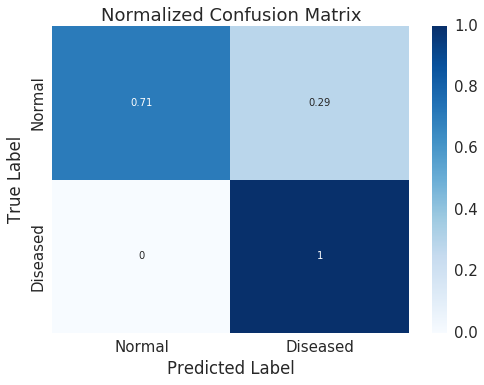

In [154]:
plot_cfsn_matrix(cm=my_cm, labels=y_qual_encoder.classes_, cmap='Blues', title=None,
                 norm=True, context=None, annot=True);

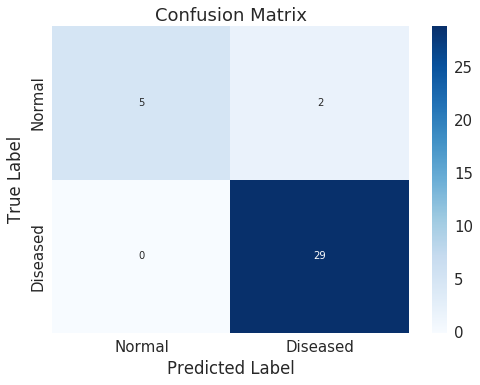

In [153]:
plot_cfsn_matrix(cm=my_cm, labels=y_qual_encoder.classes_, cmap='Blues', title=None,
                 norm=False, context=None, annot=True);

In [146]:
my_cm_df.astype('float') / my_cm_df.sum(axis=1)[:, np.newaxis]

ValueError: Shape of passed values is (1, 2), indices imply (2, 2)

# Example strategy

In [47]:
y_test
# y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.    0.62  0.38]
 [ 0.    0.    1.  ]]


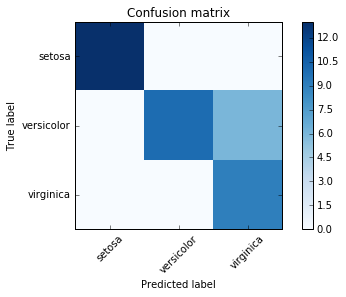

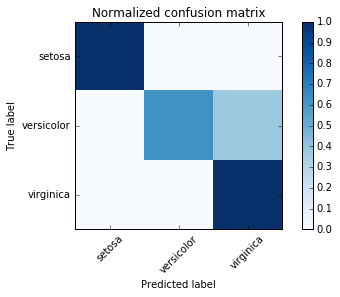

In [5]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(iris.target_names))
    plt.xticks(tick_marks, iris.target_names, rotation=45)
    plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

In [8]:
cm_df = pd.DataFrame(data=cm, index=iris.target_names, columns=iris.target_names)

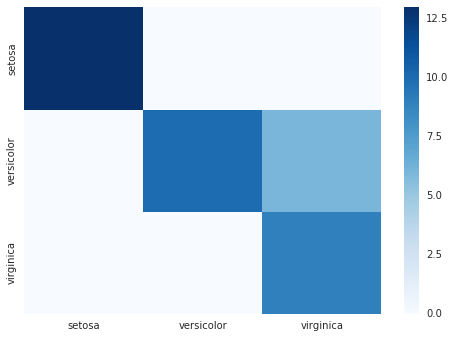

In [11]:
sns.heatmap(cm_df, cmap='Blues');

In [13]:
le = LabelEncoder()

In [17]:
tnames = le.fit_transform(iris.target_names)

In [18]:
le.inverse_transform(tnames)

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')